241


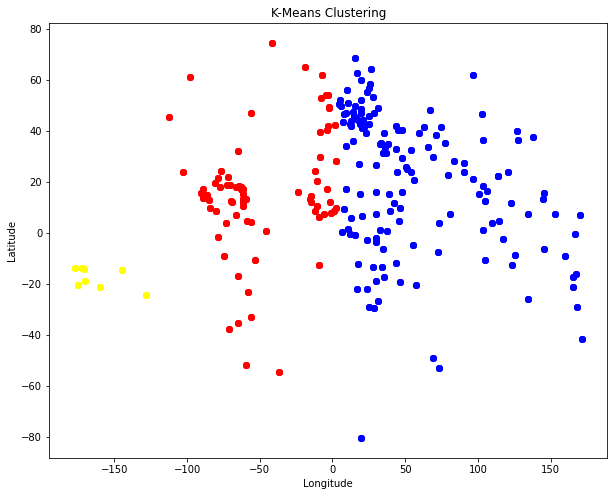

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def init_centroids(x,k):
  x = np.array(x)
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(x[:,0]),max(x[:,1]))
    cx2 = np.random.uniform(min(x[:,0]),max(x[:,1]))
    arr.append([cx1,cx2])  
  return np.asarray(arr)

def euclidean_distance(x,y):
  return np.sqrt(np.sum(np.square(x-y)))
    
def assign_cluster(k,x,prev_centroids):
   x = np.array(x)
   cluster = []
   for i in range(len(x)):
     dist_arr = []
     for j in range(k):
      dist = euclidean_distance(x[i],prev_centroids[j])
      dist_arr.append(dist)
     min = np.argmin(dist_arr) 
     cluster.append(min)
   return np.asarray(cluster)

def measure_change(k,prev_centroids,new_centroids):
  change = 0
  for i in range(k):
   change+= euclidean_distance(prev_centroids[i],new_centroids[i])
  return change


def compute_centroids(k,x,cluster):
  new_centroids = []
  x = np.array(x)
  for i in range(k):
    arr = []
    for j in range(len(x)):
      if i == cluster[j]:
        arr.append(x[j])
    centroids = np.mean(arr,axis = 0)
    new_centroids.append(centroids) 
  return np.asarray(new_centroids)


def show_clusters(k):
  colors = ["red","blue","yellow","green","purple","black"]
  fig, ax = plt.subplots(figsize=(10, 8))
  for i in range(k):
    df1 = df[df.cluster == i]
    for p in df1:
      plt.scatter(df1.Longitude,df1.Latitude,color = colors[i] )

  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.title('K-Means Clustering')
  plt.show()

def kmeans(k,x):
  
  prev_centroids = init_centroids(x,k)
  cluster_change = 100
  while cluster_change > 0.001:
    cluster = assign_cluster(k,x,prev_centroids)
    new_centroids = compute_centroids(k,x,cluster)
    cluster_change = measure_change(k,prev_centroids,new_centroids)
    prev_centroids = new_centroids
  df['cluster'] = cluster
  show_clusters(k)

df = pd.read_csv('/content/Categorical.csv')
df = df.drop(['name','continent'],axis=1)
df = df.dropna()
print(len(df))
k = 3
np.random.seed(42)
kmeans(k,df)
